<a href="https://colab.research.google.com/github/ranioktaviana/Analisis-Peramalan-Data-Produksi-Padi-Menggunakan-Metode-SARIMA-Berbasis-Python/blob/main/PERAMALAN_PRODUKSI_PADI_Metode_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

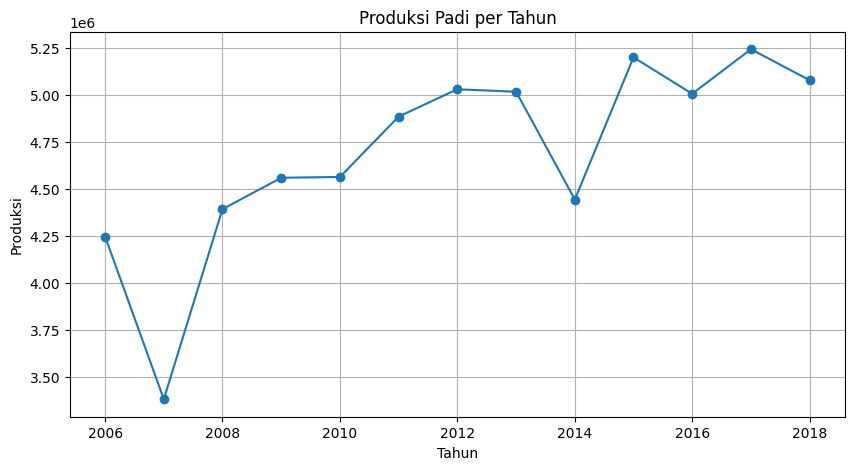

ADF Statistic : -1.825498873032638
p-value        : 0.3678776959773722
⚠️ Data belum stasioner, perlu diferensiasi (d=1)


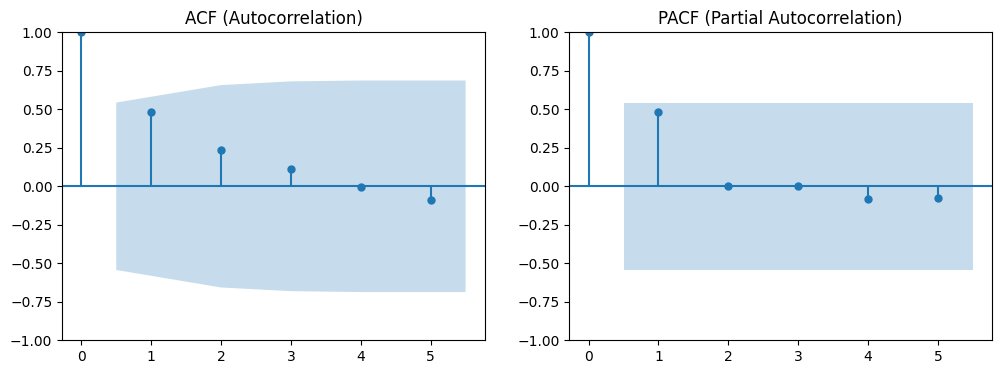

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Produksi   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -170.515
Date:                Fri, 07 Nov 2025   AIC                            347.029
Time:                        07:44:15   BIC                            348.484
Sample:                    01-01-2006   HQIC                           346.491
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5237      0.225     -2.323      0.020      -0.966      -0.082
ma.L1          0.3094      0.358      0.865      0.387      -0.392       1.011
sigma2       1.02e+11   1.78e-12   5.73e+22      0.0

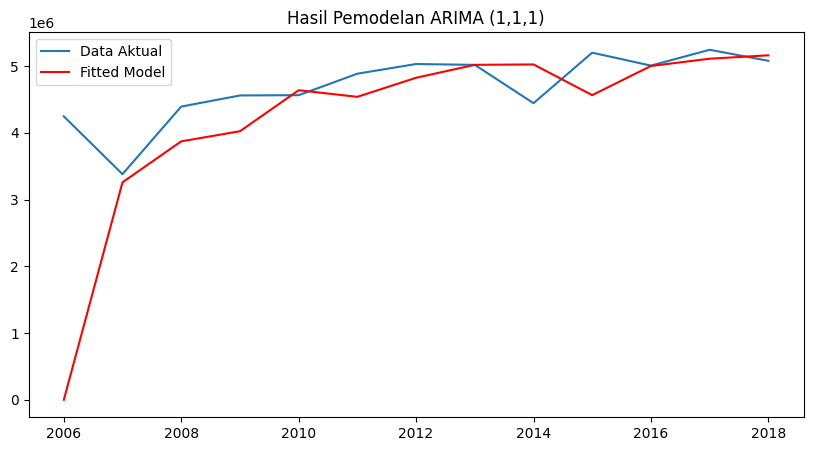


📈 Hasil Peramalan 8 Tahun ke Depan:


,predicted_mean
2019-01-01,5.140869e+06
2020-01-01,5.108912e+06
2021-01-01,5.125649e+06
2022-01-01,5.116883e+06
2023-01-01,5.121474e+06
2024-01-01,5.119070e+06
2025-01-01,5.120329e+06
2026-01-01,5.119669e+06


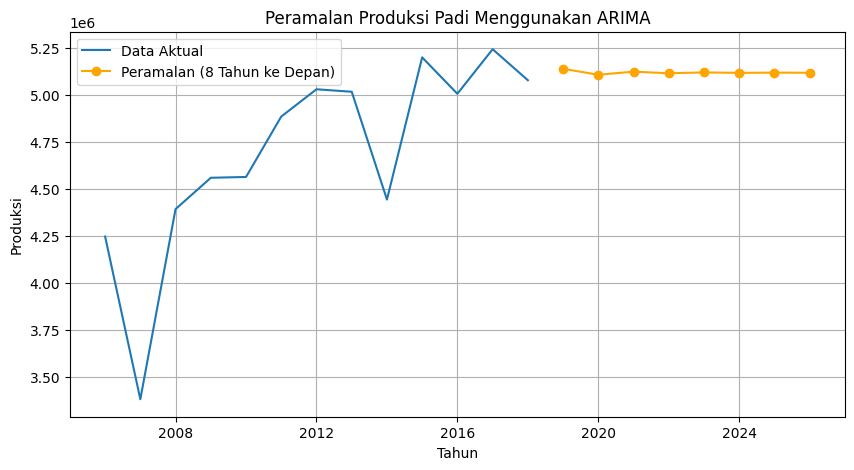

In [ ]:
# =============================================
# PERAMALAN DATA MENGGUNAKAN METODE ARIMA
# =============================================

# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 2. Baca dataset
# Gantilah path di bawah sesuai lokasi file Anda
# Skip initial rows that are not part of the data
data = pd.read_excel('/content/data produksi padi.xlsx', skiprows=3, header=None) # Assuming data starts from row 4 (index 3), read without header initially

# Remove the header row that is still present in the data
data = data.iloc[1:].copy()

# 3. Ubah nama kolom agar mudah digunakan
# Sesuaikan dengan nama kolom di dataset Anda (esempio: Tahun dan Produksi)
# Use the actual column names from the dataframe based on their position
data.rename(columns={0: 'Tahun', 2: 'Produksi'}, inplace=True)

# Drop any rows with NaN in 'Tahun' or 'Produksi' and the total row
data.dropna(subset=['Tahun', 'Produksi'], inplace=True)
data = data[data['Tahun'] != 'JUMLAH'].copy() # Use .copy() to avoid SettingWithCopyWarning

# Convert 'Tahun' to integer and 'Produksi' to numeric
data['Tahun'] = data['Tahun'].astype(int)
data['Produksi'] = pd.to_numeric(data['Produksi'])


# Urutkan berdasarkan tahun and convert 'Tahun' to datetime and set as index
data = data.sort_values('Tahun')
data['Tahun'] = pd.to_datetime(data['Tahun'], format='%Y')
data.set_index('Tahun', inplace=True)


# 4. Visualisasi data awal
plt.figure(figsize=(10,5))
plt.plot(data['Produksi'], marker='o')
plt.title('Produksi Padi per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.grid(True)
plt.show()

# 5. Uji stasioneritas (ADF Test)
result = adfuller(data['Produksi'])
print('ADF Statistic :', result[0])
print('p-value        :', result[1])
if result[1] <= 0.05:
    print("✅ Data stasioner")
else:
    print("⚠️ Data belum stasioner, perlu diferensiasi (d=1)")

# 6. Plot ACF dan PACF untuk identifikasi p dan q
fig, ax = plt.subplots(1, 2, figsize=(12,4))
plot_acf(data['Produksi'], ax=ax[0], lags=5) # Reduced lags to 5
plot_pacf(data['Produksi'], ax=ax[1], lags=5) # Reduced lags to 5
ax[0].set_title('ACF (Autocorrelation)')
ax[1].set_title('PACF (Partial Autocorrelation)')
plt.show()

# 7. Bangun model ARIMA (misal p=1, d=1, q=1)
# Nilai ini bisa disesuaikan sesuai hasil analisis ACF/PACF
model = sm.tsa.ARIMA(data['Produksi'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# 8. Visualisasi hasil fitting model
plt.figure(figsize=(10,5))
plt.plot(data['Produksi'], label='Data Aktual')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Model')
plt.title('Hasil Pemodelan ARIMA (1,1,1)')
plt.legend()
plt.show()

# 9. Peramalan 8 Tahun ke Depan
forecast_steps = 8
forecast_result = model_fit.forecast(steps=forecast_steps)

# The forecast_result will now have a DatetimeIndex, so we can directly use it
forecast_series = forecast_result

print("\n📈 Hasil Peramalan 8 Tahun ke Depan:")
display(forecast_series)

# 10. Visualisasi hasil peramalan
plt.figure(figsize=(10,5))
plt.plot(data['Produksi'], label='Data Aktual')
plt.plot(forecast_series, label='Peramalan (8 Tahun ke Depan)', color='orange', marker='o')
plt.title('Peramalan Produksi Padi Menggunakan ARIMA')
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.legend()
plt.grid(True)
plt.show()